In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import pickle
import gc
# ここから自作
import model
import result
import mode
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
# 時刻を表示してくれるようになるprint関数のwrapper
def datePrint(*args, **kwargs):
    from datetime import datetime
    print(datetime.now().strftime('[%Y/%m/%d %H:%M:%S] '), end="")
    print(*args, **kwargs)

In [3]:
datePrint("loading pickle data")
input_train = pickle.load(open("../data/acc_len5_random512/input_train.pkl","rb"))
target_train = pickle.load(open("../data/acc_len5_random512/target_train.pkl","rb")) #512以下
target_train = torch.flip(target_train, dims=[1])
input_train_2 = pickle.load(open("../data/acc_len5_random512/input_train_2.pkl","rb"))
target_train_2 = pickle.load(open("../data/acc_len5_random512/target_train_2.pkl","rb")) #512のみ
target_train_2 = torch.flip(target_train_2, dims=[1])
input_train_3 = pickle.load(open("../data/acc_len5_random512/input_train_3.pkl","rb"))
target_train_3 = pickle.load(open("../data/acc_len5_random512/target_train_3.pkl","rb")) #512のみ
target_train_3 = torch.flip(target_train_3, dims=[1])

input_all = torch.cat([input_train, input_train_2, input_train_3], dim=0)
target_all = torch.cat([target_train, target_train_2, target_train_3], dim=0)
dataset = model.Dataset(input_all, target_all)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [1200000, 300000])

del input_train, target_train, input_train_2, target_train_2, input_train_3, target_train_3, input_all, target_all
gc.collect()


[2021/02/26 00:24:26] loading pickle data


0

In [4]:
import math
def lambda_epoch(epoch):
    # スケジューラの設定
    max_epoch = 15
    return math.pow((1-epoch/max_epoch), 0.9)

[2021/02/26 00:24:44] 8 layer [2, 4, 2] flag


Epoch 1/15
train Loss:1.3907784609095255 Timer:922.1837182044983
val Loss:0.8412177931849162 Timer:55.26563549041748
Epoch 2/15
train Loss:0.6729301425774892 Timer:916.3024332523346
val Loss:0.5384194877624512 Timer:55.91864848136902
Epoch 3/15
train Loss:0.4924881776046753 Timer:922.3863451480865
val Loss:0.44527087591489156 Timer:55.53056740760803
Epoch 4/15
train Loss:0.42263612416267393 Timer:922.5194976329803
val Loss:0.40158864471753436 Timer:55.35911679267883
Epoch 5/15
train Loss:0.38333017773628236 Timer:918.7263474464417
val Loss:0.37288010179201764 Timer:76.5565972328186


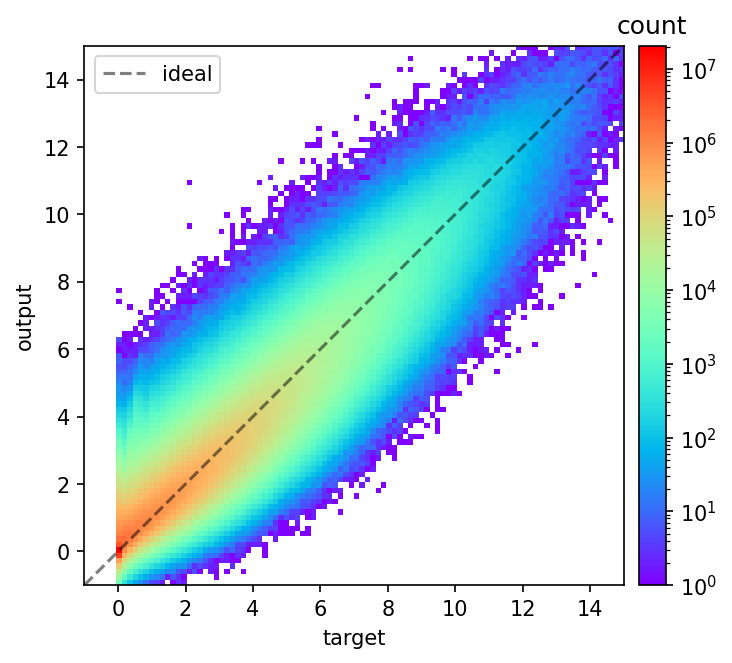

Epoch 6/15
train Loss:0.3494023118575414 Timer:922.6858739852905
val Loss:0.3355476873588562 Timer:56.227848529815674
Epoch 7/15
train Loss:0.32557995624860125 Timer:917.786318063736
val Loss:0.32218099079767865 Timer:55.30778646469116
Epoch 8/15
train Loss:0.30789632062276207 Timer:917.0423521995544
val Loss:0.3003147664515177 Timer:57.623332023620605
Epoch 9/15
train Loss:0.29412372609535853 Timer:914.7786226272583
val Loss:0.2875988888168335 Timer:56.95684862136841
Epoch 10/15
train Loss:0.28068404095172883 Timer:921.0555169582367
val Loss:0.2767812121963501 Timer:77.55675101280212


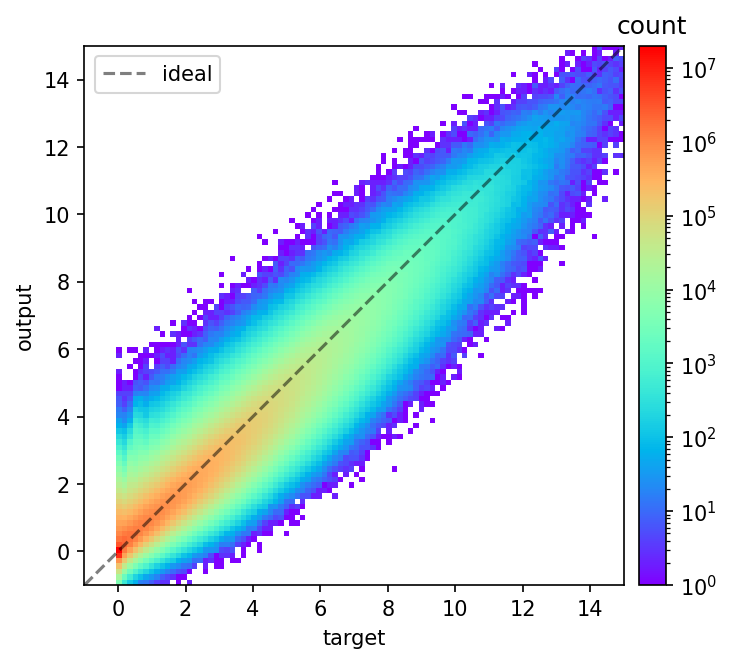

Epoch 11/15
train Loss:0.2711907361094157 Timer:920.1547689437866
val Loss:0.27076045011520383 Timer:55.94384241104126
Epoch 12/15
train Loss:0.2621891812499364 Timer:917.1106300354004
val Loss:0.25981550055185954 Timer:55.415950775146484
Epoch 13/15
train Loss:0.2551087725551923 Timer:923.7850737571716
val Loss:0.25310909649213154 Timer:57.264204025268555
Epoch 14/15
train Loss:0.24990461158831914 Timer:921.9489643573761
val Loss:0.25010668183644613 Timer:56.524425983428955
Epoch 15/15
train Loss:0.24364643968900046 Timer:929.4186878204346
val Loss:0.2400983062616984 Timer:78.88208794593811


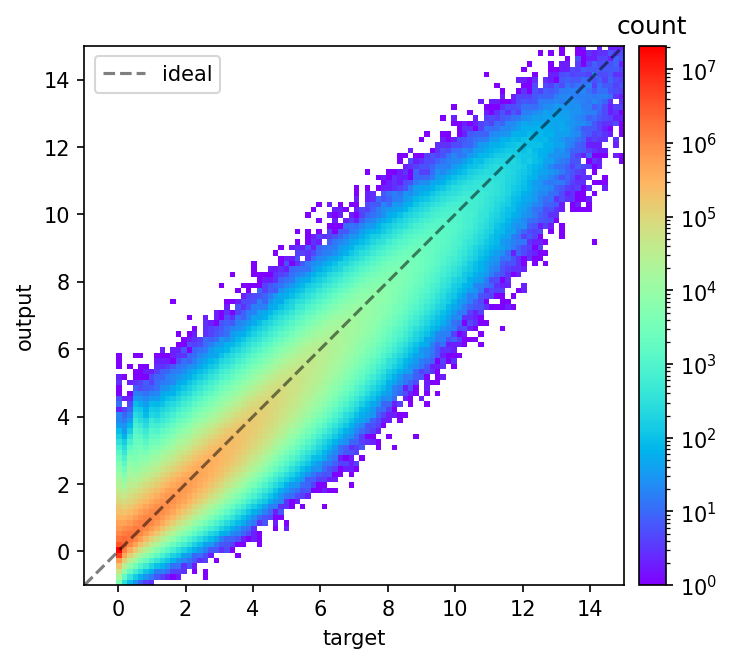

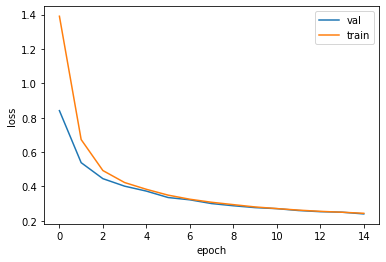

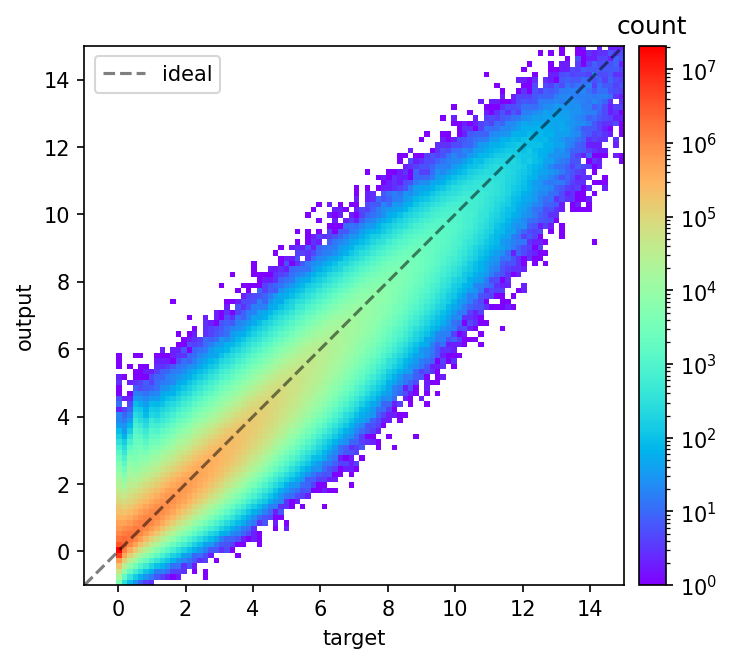

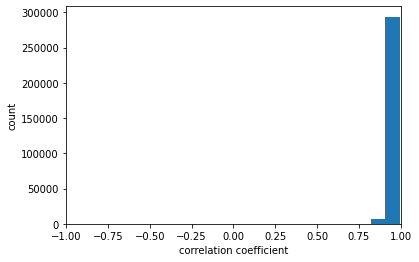

0.9482371384258258


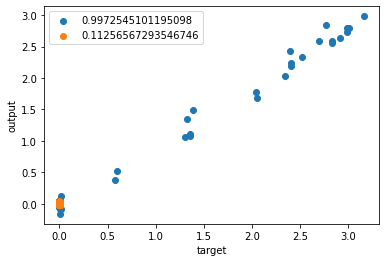

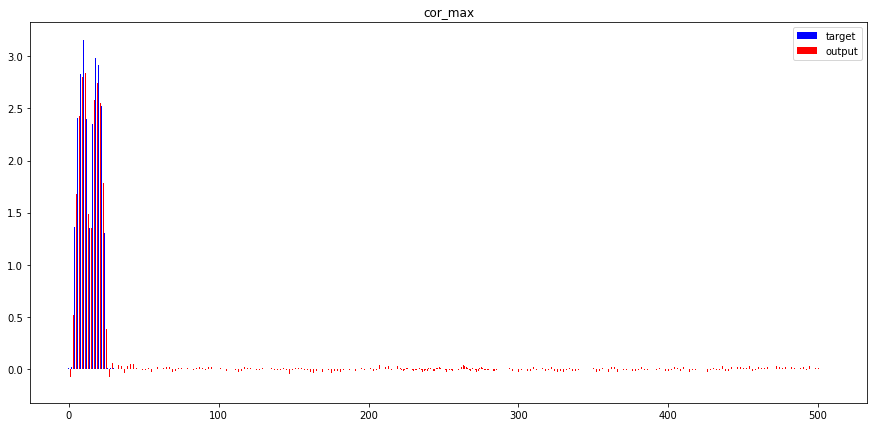

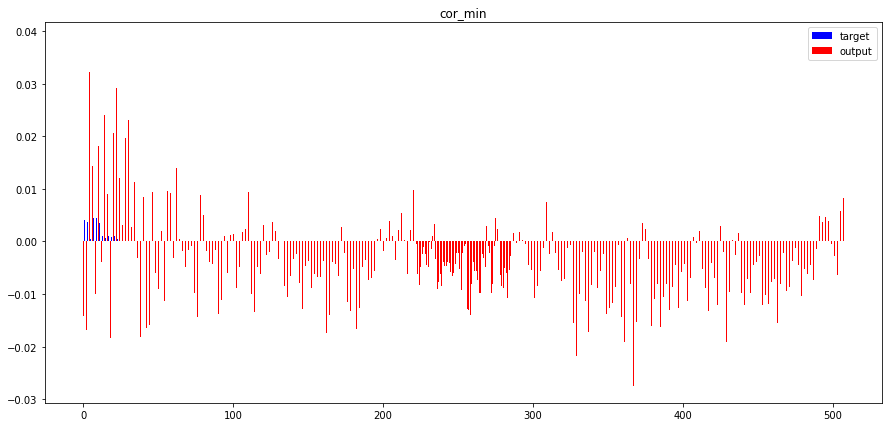

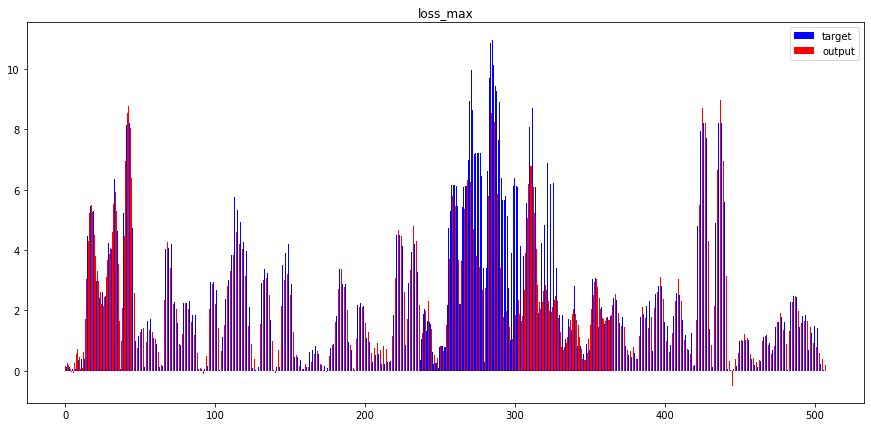

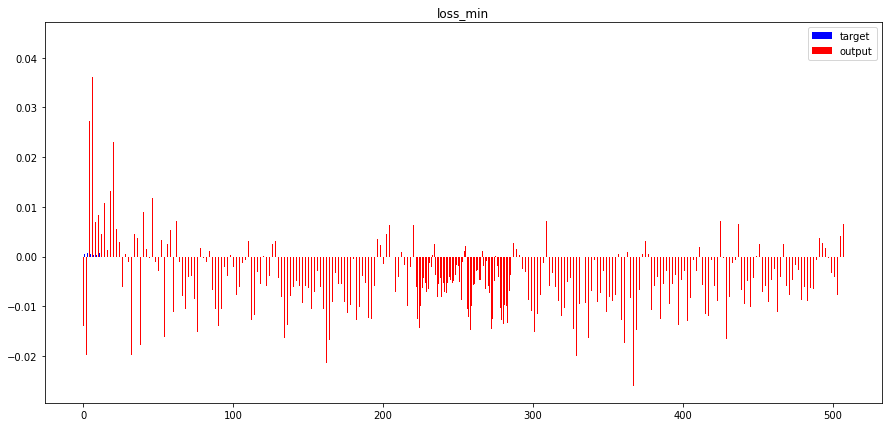

cor_max GUUUUGUAUUGUUUGGACCCGACAAUUAUAGCAAG
cor_min UUUAAUCCUCUACUCCCACUCAAAUUUC
loss_max AUACCCUUGCUUGUGAACGCAGCCCGCUGCUAGCCCCCCUCAGGGGUACCGACUCGACGUUGUAUAGCCGGGACGAAACUCUUCAUCCGCACGUCGUUAGCCUGGUAAAGGGGUUCGGGGACGAGAUGAGAUUCCCCGUUAAUAUGCCCGGGAUAUGUUAACCAAUACACAACAACAACCGGUGAACCUAGUAUAAAGGCUUGGUCAAUUAGCAAAUAGUAUGACGCUUAGGGGCGUGUGGCAGGGCUAAUUCACCUUUUCUGCUACCGCAGAUCCGCGCUGUCGGCGUGGGACGCGCCGUGCGUGUAUGCGCGCCGCCUCGGUAGCGUGAAGGGAUUUUCCAGGUUGCUUAAUCUGUCUAAGGUUACGAAGACAACGAAUCGUGUAGGACUUGUCGGUCGACCACAUCGGUGAAAGUCAGUUUACGCGGUGUCCAUGCCGCAGAACUUGACGACUCCGCUUUAAAAUCGAGUUACAAGAGCGGACACUCUAAGAUGAGACGUCAUAAGGGG
loss_min UCUACAACCCCACACUA


In [5]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
dataloaders_dict = {'train': train_dataloader, 'val': val_dataloader}

for n in [8]:
    for x in [[2,4,2]]:
        datePrint(n, 'layer', x, 'flag')
        net = model.Fixed(num_layer=n, flag=x, length=512).to(device)
        net.apply(model.weight_init) #重みの初期化適用

        #ファインチューニング
#         optimizer = optim.Adam([{'params': net.embedding.parameters(), 'lr': 1e-6},
#                                 {'params': net.convs.parameters(), 'lr': 5e-6},
#                                 {'params': net.residuals.parameters(), 'lr': 1e-5},
#                                 {'params': net.mid.parameters(), 'lr': 5e-5},
#                                 {'params': net.fc.parameters(), 'lr': 1e-4}], weight_decay=1e-6)
        optimizer = optim.Adam(net.parameters(), lr=1e-4, weight_decay=5e-6)

        epochs = 15
        criterion = nn.MSELoss().to(device)
        
        
#         # 学習途中データ
#         checkpoint = torch.load('512_middle.pth')
#         net.load_state_dict(checkpoint['model_state_dict'])
#         optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#         epochs = checkpoint['epoch']
#         loss = checkpoint['loss']
        
        scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_epoch)
        train_loss_list, val_loss_list, data_all, target_all, output_all = mode.train(device, net, dataloaders_dict, criterion, optimizer, epochs)               
        torch.save(net.state_dict(), '512_finish.pth')

        result.learning_curve(train_loss_list, val_loss_list, epochs)
        result.plot_result(np.array(target_all, dtype=object).reshape(-1), np.array(output_all, dtype=object).reshape(-1))
        cor_list, loss_list = result.cal_indicators(target_all, output_all)
        result.cor_hist(cor_list)
        result.scatter_minmax(cor_list, loss_list, target_all, output_all)
        result.visible_minmax(target_all, output_all, cor_list, loss_list)
        result.show_base(data_all, cor_list, loss_list)

In [6]:
input_test = pickle.load(open("../data/test_sets/input_600_1000.pkl","rb"))
target_test = pickle.load(open("../data/test_sets/target_600_1000.pkl","rb"))
target_test = torch.flip(target_test, dims=[1])
datePrint(input_test.shape)
datePrint(target_test.shape)
if (input_test.shape[1]%512 != 0):
    input_test = F.pad(input_test, (0, 512-input_test.shape[1]%512))
    target_test = F.pad(target_test, (0, 508-target_test.shape[1]%512))
if (input_test.shape[1]>512):
    transform = True
    division = (input_test.shape[1])//256 - 1
    input_init = input_test
    input_test = input_test.unfold(1, 512, 256).reshape(-1, 512)
    target_test = target_test.unfold(1, 508, 256).reshape(-1, 508)
else:
    transform = False
datePrint(input_test.shape)
datePrint(target_test.shape)
test_dataset = model.Dataset(input_test, target_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle=False, num_workers=1)

net = model.Fixed(num_layer=8, flag=[2,4,2], length=512).to(device)
net.load_state_dict(torch.load('512_finish.pth'))
criterion = nn.MSELoss().to(device)

start = time.time()
test_loss, data_all, target_all, output_all = mode.test(device, net, test_dataloader, criterion) 
datePrint('finish prediction loss', test_loss)
if (transform==True):
    target_tmp = torch.tensor(target_all)
    output_tmp = torch.tensor(output_all)
    for n in range(division):
        if (n==0):
            target_all = target_tmp[n::division, :384]
            output_all = output_tmp[n::division, :384]
        elif (n==division-1):
            target_all = torch.cat([target_all, target_tmp[n::division, 128:]], dim=1)
            output_all = torch.cat([output_all, output_tmp[n::division, 128:]], dim=1)
        else:
            target_all = torch.cat([target_all, target_tmp[n::division, 128:384]], dim=1)
            output_all = torch.cat([output_all, output_tmp[n::division, 128:384]], dim=1)
    
    data_all = input_init.numpy()
    target_all = target_all.numpy()
    output_all = output_all.numpy()
finish = time.time()
# with open('accessibility_output.txt', 'w') as f:
#     print(output_all, file=f)
# finish = time.time()
datePrint('予測時間', (finish-start))

[2021/02/26 04:33:06] torch.Size([1000, 1000])
[2021/02/26 04:33:06] torch.Size([1000, 996])
[2021/02/26 04:33:06] torch.Size([3000, 512])
[2021/02/26 04:33:06] torch.Size([3000, 508])
[2021/02/26 04:33:10] finish prediction loss 0.2858146029583951
[2021/02/26 04:33:11] 予測時間 4.102763414382935


[2021/02/26 04:33:11] test_loss: 0.286


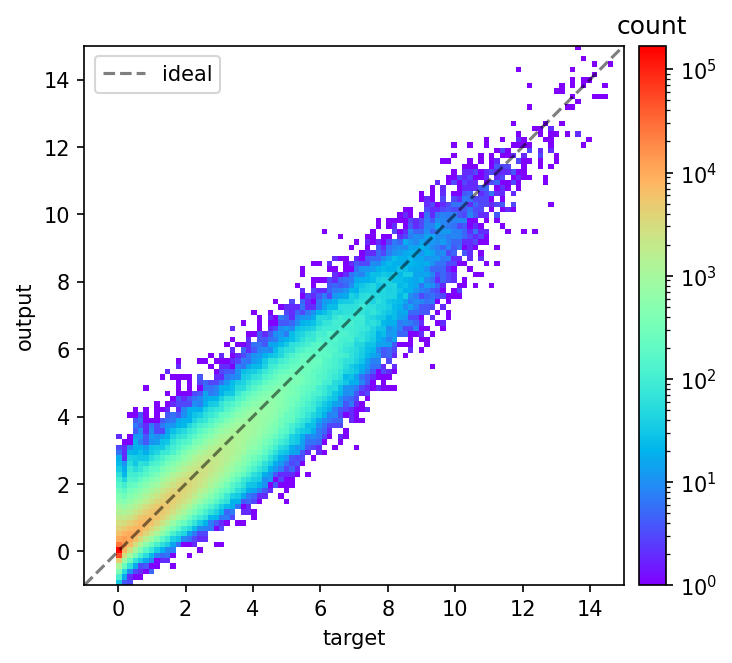

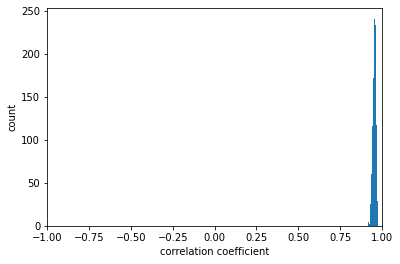

0.9546323162135696


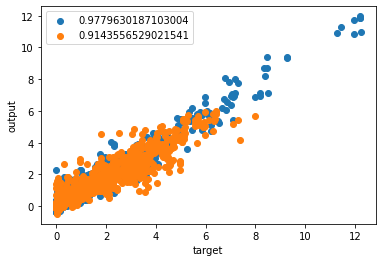

In [7]:
datePrint('test_loss: {:.3f}'.format(test_loss))
result.plot_result(np.array(target_all).reshape(-1), np.array(output_all).reshape(-1))
cor_list, loss_list = result.cal_indicators(target_all, output_all)
result.cor_hist(cor_list)
result.scatter_minmax(cor_list, loss_list, target_all, output_all)

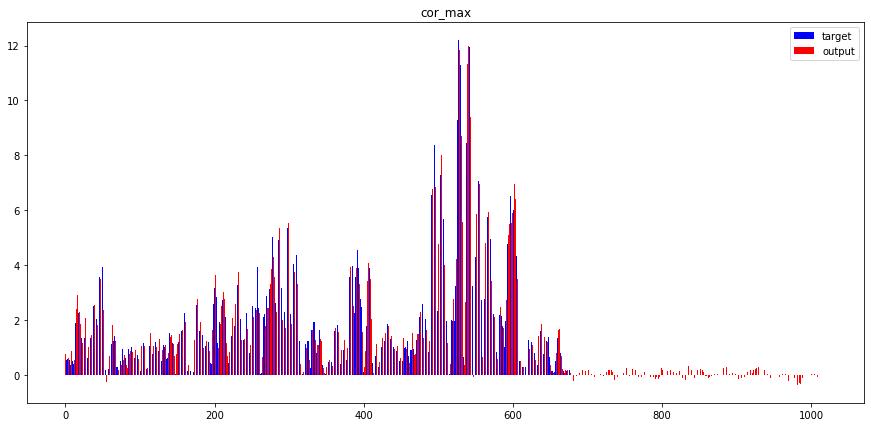

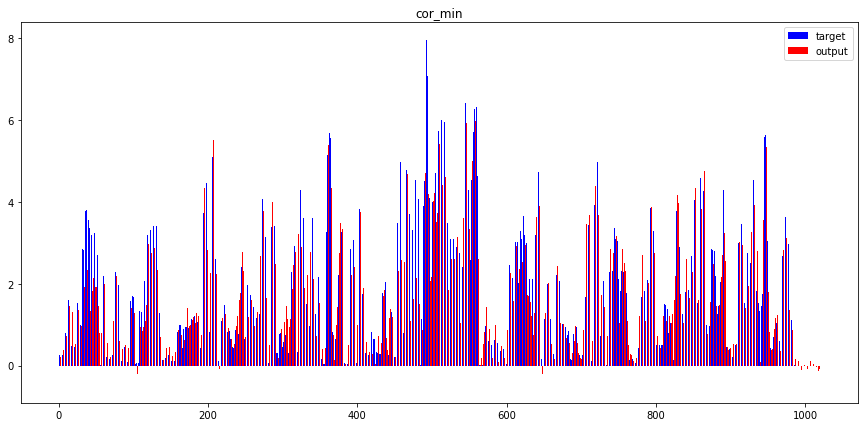

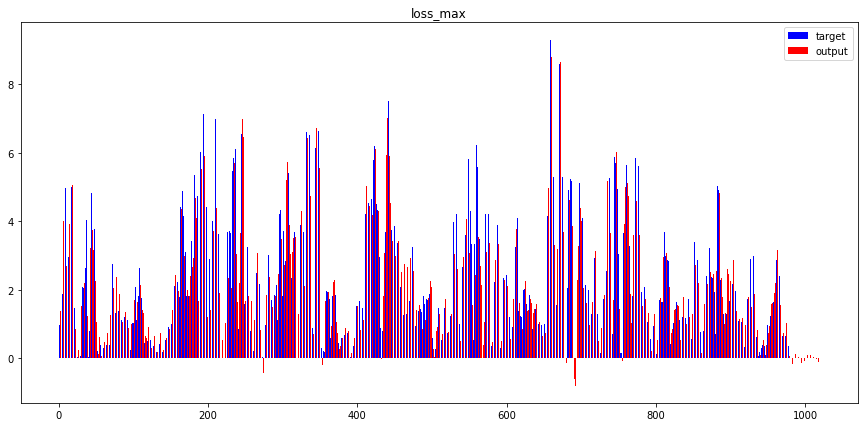

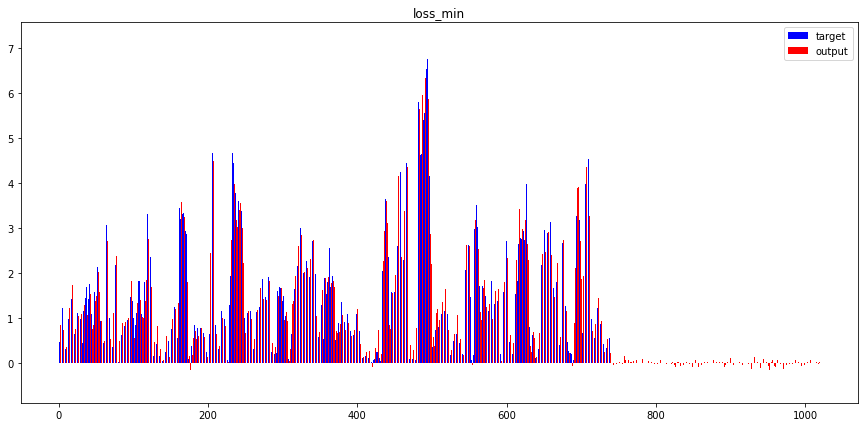

cor_max GGACGAACAGUACAUUCAGAGUCUUGCUCAUACUCGACGGCGUAUGCUAUCGCGAUAGAAAACGAGCGAAGUCAAAAAGCGGGGGUCAAUGGGGAAGCGGCGUAUACCAAGAACAUCGUAACGAUUGCUGAGUACGAGCCGACUGUUGAAUGAGACACAAGGGGAUCGCGGAAUUAACCCAAGCGCAGUCGUGGCCAUCUAGGGGAGUGACUCACCGUAUCUAACUGCGAGAGCCGUGGCAUGCAGGCGGAGGCACAUCGAGUCACUUUUGGAUGGGGCACGCGAAUAGCGUCAUAAAGUGGGGAGAUCCUACCGAAUCCAAUCCUUCGCUCAAGUGUUUUCGCAUCUUAUACCCUGUCGACAUAGCCAGAUUCGGUAUUUCGUGGGUGCACCCUGGCGGUAUUUUGGCCACUAAUUGGUGUUUCGUAUGUCUUGGACACUCAUUGAGAUAGACCGCCUCGUAGAUGUCUUAUAGUGCGCUGAGGAAGUCGACACCUGGACAUCCAGGGAGGUAUACGUAACCAAUAGAGCGCUACUUUUGGCGCUCCUUAUAGUGGGAUCGACCGUCUCACAAUGUAGUGAUCACAUUAAGCUUUUCGGAGACGAGAGAGUCGAAAUCAUUUACGUACUCUUUAUAAGGCAUGCAAGCUCCACGUUAAAUAGCUGUUCACAUUUUGCCGAC
cor_min UAGCAUCGUGUCUAGUUUCCAUAGCGUAGGGGUAGCUUAAUCUAAGGAGAUCGGGUAUAUGCGGGAAUGAGAUAUAGACCGAGGGACCACUAUAGAAAAUAGCUCACCGUUUGUUAUAUCAGGUUGAGAGACAGGGUUAAUUUCUUCAGACUUUCCGCUACCUAGACAUAUCUGAACGCUGAUCUCGCCGAACUAGAGGGGGUUAAUCCCUUUGUUCAAGAAGGAAAACCGACGUAAAUCCGCAUAGGUGAGUUCAACUUAGUACGACUUGGUCAGACAUUUUAUAUUGUCAUCGUCCGGA

In [8]:
result.visible_minmax(target_all, output_all, cor_list, loss_list)
result.show_base(data_all, cor_list, loss_list)

random= 320


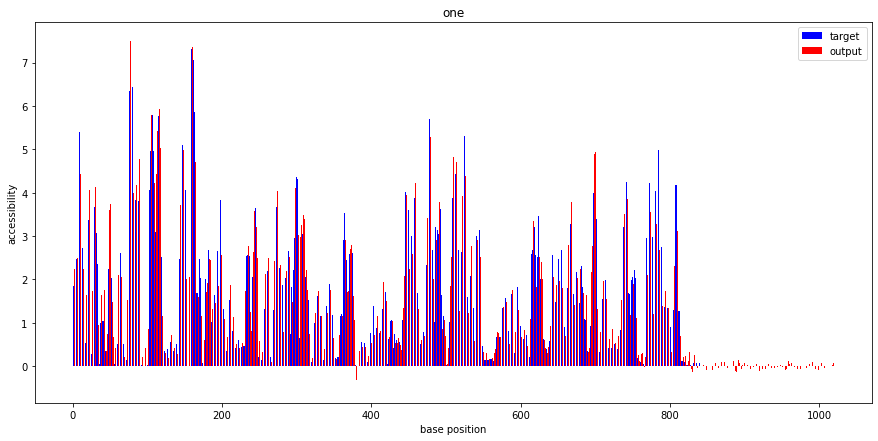

random= 316


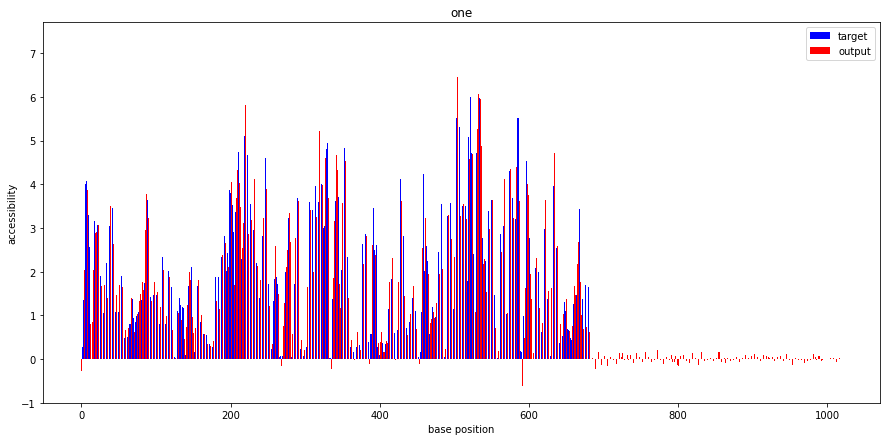

random= 479


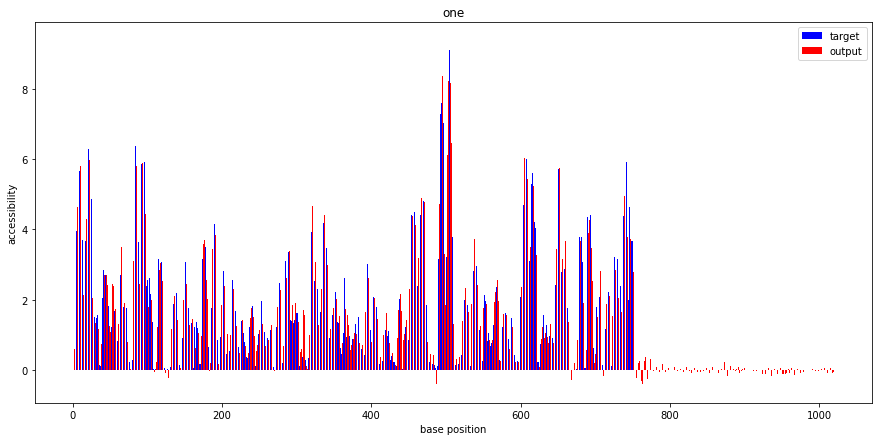

random= 643


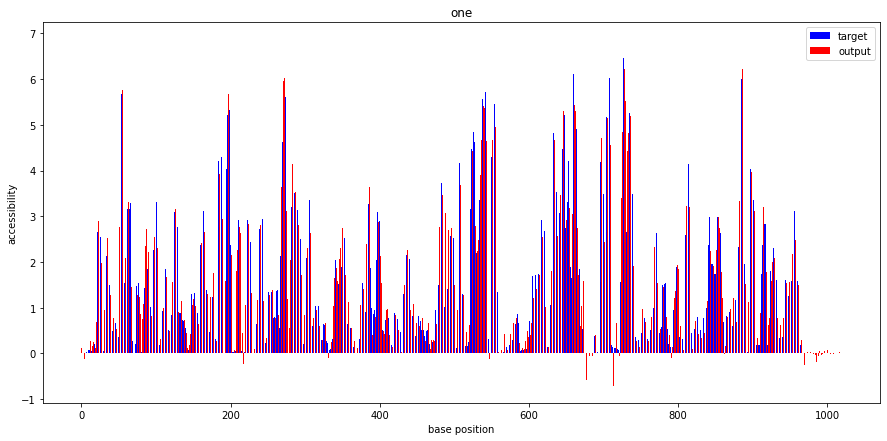

In [9]:
for i in range(4):
    result.visible_one(target_all, output_all)

In [10]:
start = time.time()
input_seq = pickle.load(open("../data/test_sets/input_600_1000.pkl","rb"))
input_seq = torch.flip(input_seq, dims=[1])
datePrint(input_seq.shape)

if (input_seq.shape[1]%512 != 0):
    input_seq = F.pad(input_seq, (0, 512-input_seq.shape[1]%512))
if (input_seq.shape[1]>512):
    division = (input_seq.shape[1])//256 - 1
    input_init = input_seq
    input_seq = input_seq.unfold(1, 512, 256).reshape(-1, 512)
datePrint(input_seq.shape)    

net = model.Fixed(num_layer=8, flag=[1,3,2], length=512).to(device)
net.load_state_dict(torch.load('256_finish.pth'))
criterion = nn.MSELoss().to(device)
    
data_all, output_all = mode.predict(device, net, input_seq) 

if (input_tmp.shape[1]>512):
    output_tmp = torch.tensor(output_all)
    for n in range(division):
        if (n==0):
            output_all = output_tmp[n::division, :384]
        elif (n==division-1):
            output_all = torch.cat([output_all, output_tmp[n::division, 128:]], dim=1)
        else:
            output_all = torch.cat([output_all, output_tmp[n::division, 128:384]], dim=1)
    
    data_all = input_init.numpy()
    output_all = output_all.numpy()
    
with open('accessibility_output.txt', 'w') as f:
    datePrint(output, file=f)
finish = time.time()
datePrint('予測時間', (finish-start))

[2021/02/26 04:33:39] torch.Size([1000, 1000])
[2021/02/26 04:33:39] torch.Size([3000, 512])


RuntimeError: Error(s) in loading state_dict for Fixed:
	Missing key(s) in state_dict: "residuals.0.block.cbr_1.conv.weight", "residuals.0.block.cbr_1.conv.bias", "residuals.0.block.cbr_1.batchnorm.weight", "residuals.0.block.cbr_1.batchnorm.bias", "residuals.0.block.cbr_1.batchnorm.running_mean", "residuals.0.block.cbr_1.batchnorm.running_var", "residuals.0.block.cbr_2.conv.weight", "residuals.0.block.cbr_2.conv.bias", "residuals.0.block.cbr_2.batchnorm.weight", "residuals.0.block.cbr_2.batchnorm.bias", "residuals.0.block.cbr_2.batchnorm.running_mean", "residuals.0.block.cbr_2.batchnorm.running_var", "residuals.0.block.cb_3.conv.weight", "residuals.0.block.cb_3.conv.bias", "residuals.0.block.cb_3.batchnorm.weight", "residuals.0.block.cb_3.batchnorm.bias", "residuals.0.block.cb_3.batchnorm.running_mean", "residuals.0.block.cb_3.batchnorm.running_var", "residuals.0.block.cb_residual.conv.weight", "residuals.0.block.cb_residual.conv.bias", "residuals.0.block.cb_residual.batchnorm.weight", "residuals.0.block.cb_residual.batchnorm.bias", "residuals.0.block.cb_residual.batchnorm.running_mean", "residuals.0.block.cb_residual.batchnorm.running_var", "residuals.1.block.cbr_1.conv.weight", "residuals.1.block.cbr_1.conv.bias", "residuals.1.block.cbr_1.batchnorm.weight", "residuals.1.block.cbr_1.batchnorm.bias", "residuals.1.block.cbr_1.batchnorm.running_mean", "residuals.1.block.cbr_1.batchnorm.running_var", "residuals.1.block.cbr_2.conv.weight", "residuals.1.block.cbr_2.conv.bias", "residuals.1.block.cbr_2.batchnorm.weight", "residuals.1.block.cbr_2.batchnorm.bias", "residuals.1.block.cbr_2.batchnorm.running_mean", "residuals.1.block.cbr_2.batchnorm.running_var", "residuals.1.block.cb_3.conv.weight", "residuals.1.block.cb_3.conv.bias", "residuals.1.block.cb_3.batchnorm.weight", "residuals.1.block.cb_3.batchnorm.bias", "residuals.1.block.cb_3.batchnorm.running_mean", "residuals.1.block.cb_3.batchnorm.running_var", "residuals.1.block.cb_residual.conv.weight", "residuals.1.block.cb_residual.conv.bias", "residuals.1.block.cb_residual.batchnorm.weight", "residuals.1.block.cb_residual.batchnorm.bias", "residuals.1.block.cb_residual.batchnorm.running_mean", "residuals.1.block.cb_residual.batchnorm.running_var", "residuals.1.block2.cbr_1.conv.weight", "residuals.1.block2.cbr_1.conv.bias", "residuals.1.block2.cbr_1.batchnorm.weight", "residuals.1.block2.cbr_1.batchnorm.bias", "residuals.1.block2.cbr_1.batchnorm.running_mean", "residuals.1.block2.cbr_1.batchnorm.running_var", "residuals.1.block2.cbr_2.conv.weight", "residuals.1.block2.cbr_2.conv.bias", "residuals.1.block2.cbr_2.batchnorm.weight", "residuals.1.block2.cbr_2.batchnorm.bias", "residuals.1.block2.cbr_2.batchnorm.running_mean", "residuals.1.block2.cbr_2.batchnorm.running_var", "residuals.1.block2.cb_3.conv.weight", "residuals.1.block2.cb_3.conv.bias", "residuals.1.block2.cb_3.batchnorm.weight", "residuals.1.block2.cb_3.batchnorm.bias", "residuals.1.block2.cb_3.batchnorm.running_mean", "residuals.1.block2.cb_3.batchnorm.running_var", "residuals.1.block3.cbr_1.conv.weight", "residuals.1.block3.cbr_1.conv.bias", "residuals.1.block3.cbr_1.batchnorm.weight", "residuals.1.block3.cbr_1.batchnorm.bias", "residuals.1.block3.cbr_1.batchnorm.running_mean", "residuals.1.block3.cbr_1.batchnorm.running_var", "residuals.1.block3.cbr_2.conv.weight", "residuals.1.block3.cbr_2.conv.bias", "residuals.1.block3.cbr_2.batchnorm.weight", "residuals.1.block3.cbr_2.batchnorm.bias", "residuals.1.block3.cbr_2.batchnorm.running_mean", "residuals.1.block3.cbr_2.batchnorm.running_var", "residuals.1.block3.cb_3.conv.weight", "residuals.1.block3.cb_3.conv.bias", "residuals.1.block3.cb_3.batchnorm.weight", "residuals.1.block3.cb_3.batchnorm.bias", "residuals.1.block3.cb_3.batchnorm.running_mean", "residuals.1.block3.cb_3.batchnorm.running_var", "residuals.2.block.cbr_1.conv.weight", "residuals.2.block.cbr_1.conv.bias", "residuals.2.block.cbr_1.batchnorm.weight", "residuals.2.block.cbr_1.batchnorm.bias", "residuals.2.block.cbr_1.batchnorm.running_mean", "residuals.2.block.cbr_1.batchnorm.running_var", "residuals.2.block.cbr_2.conv.weight", "residuals.2.block.cbr_2.conv.bias", "residuals.2.block.cbr_2.batchnorm.weight", "residuals.2.block.cbr_2.batchnorm.bias", "residuals.2.block.cbr_2.batchnorm.running_mean", "residuals.2.block.cbr_2.batchnorm.running_var", "residuals.2.block.cb_3.conv.weight", "residuals.2.block.cb_3.conv.bias", "residuals.2.block.cb_3.batchnorm.weight", "residuals.2.block.cb_3.batchnorm.bias", "residuals.2.block.cb_3.batchnorm.running_mean", "residuals.2.block.cb_3.batchnorm.running_var", "residuals.2.block.cb_residual.conv.weight", "residuals.2.block.cb_residual.conv.bias", "residuals.2.block.cb_residual.batchnorm.weight", "residuals.2.block.cb_residual.batchnorm.bias", "residuals.2.block.cb_residual.batchnorm.running_mean", "residuals.2.block.cb_residual.batchnorm.running_var", "residuals.2.block2.cbr_1.conv.weight", "residuals.2.block2.cbr_1.conv.bias", "residuals.2.block2.cbr_1.batchnorm.weight", "residuals.2.block2.cbr_1.batchnorm.bias", "residuals.2.block2.cbr_1.batchnorm.running_mean", "residuals.2.block2.cbr_1.batchnorm.running_var", "residuals.2.block2.cbr_2.conv.weight", "residuals.2.block2.cbr_2.conv.bias", "residuals.2.block2.cbr_2.batchnorm.weight", "residuals.2.block2.cbr_2.batchnorm.bias", "residuals.2.block2.cbr_2.batchnorm.running_mean", "residuals.2.block2.cbr_2.batchnorm.running_var", "residuals.2.block2.cb_3.conv.weight", "residuals.2.block2.cb_3.conv.bias", "residuals.2.block2.cb_3.batchnorm.weight", "residuals.2.block2.cb_3.batchnorm.bias", "residuals.2.block2.cb_3.batchnorm.running_mean", "residuals.2.block2.cb_3.batchnorm.running_var". 
	Unexpected key(s) in state_dict: "convs.8.conv.weight", "convs.8.conv.bias", "convs.8.batchnorm.weight", "convs.8.batchnorm.bias", "convs.8.batchnorm.running_mean", "convs.8.batchnorm.running_var", "convs.8.batchnorm.num_batches_tracked", "convs.9.conv.weight", "convs.9.conv.bias", "convs.9.batchnorm.weight", "convs.9.batchnorm.bias", "convs.9.batchnorm.running_mean", "convs.9.batchnorm.running_var", "convs.9.batchnorm.num_batches_tracked", "convs.10.conv.weight", "convs.10.conv.bias", "convs.10.batchnorm.weight", "convs.10.batchnorm.bias", "convs.10.batchnorm.running_mean", "convs.10.batchnorm.running_var", "convs.10.batchnorm.num_batches_tracked", "convs.11.conv.weight", "convs.11.conv.bias", "convs.11.batchnorm.weight", "convs.11.batchnorm.bias", "convs.11.batchnorm.running_mean", "convs.11.batchnorm.running_var", "convs.11.batchnorm.num_batches_tracked", "convs.12.conv.weight", "convs.12.conv.bias", "convs.12.batchnorm.weight", "convs.12.batchnorm.bias", "convs.12.batchnorm.running_mean", "convs.12.batchnorm.running_var", "convs.12.batchnorm.num_batches_tracked", "convs.13.conv.weight", "convs.13.conv.bias", "convs.13.batchnorm.weight", "convs.13.batchnorm.bias", "convs.13.batchnorm.running_mean", "convs.13.batchnorm.running_var", "convs.13.batchnorm.num_batches_tracked", "convs.14.conv.weight", "convs.14.conv.bias", "convs.14.batchnorm.weight", "convs.14.batchnorm.bias", "convs.14.batchnorm.running_mean", "convs.14.batchnorm.running_var", "convs.14.batchnorm.num_batches_tracked", "convs.15.conv.weight", "convs.15.conv.bias", "convs.15.batchnorm.weight", "convs.15.batchnorm.bias", "convs.15.batchnorm.running_mean", "convs.15.batchnorm.running_var", "convs.15.batchnorm.num_batches_tracked". 
	size mismatch for mid.weight: copying a param with shape torch.Size([400, 32768]) from checkpoint, the shape in current model is torch.Size([400, 65536]).
	size mismatch for fc.weight: copying a param with shape torch.Size([252, 400]) from checkpoint, the shape in current model is torch.Size([508, 400]).
	size mismatch for fc.bias: copying a param with shape torch.Size([252]) from checkpoint, the shape in current model is torch.Size([508]).

In [ ]:
#メモリ確認
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000: #10M以上のみ表示
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))